In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import os, sys
import warnings
%matplotlib inline

In [2]:
df=pd.read_csv("/content/drive/MyDrive/csv/android-games.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [4]:

df.nunique()

rank                 100
title               1672
total ratings       1700
installs               9
average rating       140
growth (30 days)     142
growth (60 days)     194
price                  6
category              17
5 star ratings      1700
4 star ratings      1691
3 star ratings      1681
2 star ratings      1651
1 star ratings      1684
paid                   2
dtype: int64

In [7]:
df.isnull().sum()


rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [8]:
df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False


In [13]:
df['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [14]:
# define a unit transform function to work with .apply()
def unit_transform(value):
    if value[-1].lower() == 'm':
        return float(value[:-1].strip()) * 1000000
    elif value[-1].lower() == 'k':
        return float(value[:-1].strip()) * 1000

In [15]:
# transform installs column
df['installs'] = df['installs'].apply(unit_transform)
df['installs'][:3]

0    500000000.0
1    100000000.0
2    100000000.0
Name: installs, dtype: float64

In [16]:
# select all 1st rank games sorted by average rating
df[df['rank'] == 1].sort_values(by = 'average rating', ascending = False)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1624,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,2314831,1.000000e+07,4.71,2.5,5.4,0.0,GAME WORD,2032320,98719,65303,30091,88396,False
622,1,Candy Crush Saga,30859251,1.000000e+09,4.56,0.7,1.6,0.0,GAME CASUAL,23521533,4128497,1484852,457810,1266557,False
1224,1,Dragon City,8241702,1.000000e+08,4.56,0.9,1.8,0.0,GAME SIMULATION,6537535,816099,324906,128958,434201,False
1424,1,Clash of Clans,55170976,5.000000e+08,4.49,0.3,0.6,0.0,GAME STRATEGY,42736445,5397273,2285363,978099,3773793,False
100,1,Roblox,20649769,1.000000e+08,4.47,4.2,8.4,0.0,GAME ADVENTURE,16057759,1836135,753095,369209,1633569,False
1324,1,Dream League Soccer,13374620,1.000000e+08,4.45,0.0,0.1,0.0,GAME SPORTS,10064893,1456557,649320,268502,935345,False
200,1,Subway Surfers,35305263,1.000000e+09,4.44,0.5,1.1,0.0,GAME ARCADE,26840330,3377645,1618461,801027,2667798,False
924,1,Fishdom,4739196,1.000000e+08,4.39,1.9,3.1,0.0,GAME PUZZLE,3553379,426229,221763,116589,421233,False
400,1,Yu-Gi-Oh! Duel Links,2095571,5.000000e+07,4.36,0.5,1.2,0.0,GAME CARD,1533255,214021,101552,53016,193725,False
0,1,Garena Free Fire - The Cobra,80678661,5.000000e+08,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False


In [17]:
# set plot style and font scale
sns.set(style = 'darkgrid', font_scale = 1)

In [18]:
# create text of game titles
titles = ', '.join(df['title'].to_list())
titles[:100]

'Garena Free Fire - The Cobra, PUBG MOBILE: Graffiti Prank, Mobile Legends: Bang Bang, Brawl Stars, S'

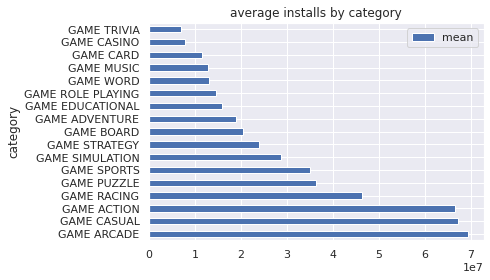

In [19]:
# Average installations by game category
df.groupby('category').agg(['mean'])['installs'].sort_values(by = 'mean', ascending = False).plot(kind = 'barh', title = 'average installs by category')

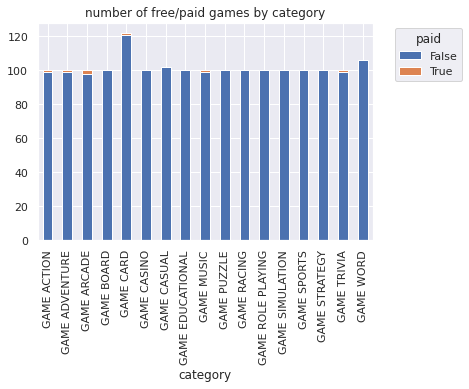

In [20]:
# Number of free, paid games by category
df.pivot_table(index = 'category', columns = 'paid', values = 'rank',aggfunc='count').plot(kind = 'bar', stacked = True, title = 'number of free/paid games by category')
plt.legend(bbox_to_anchor = (1.05,1), title = 'paid')
# df.groupby(['category','paid']).count()['title']

Text(0.5, 1.0, 'Average rating (free vs paid games)')

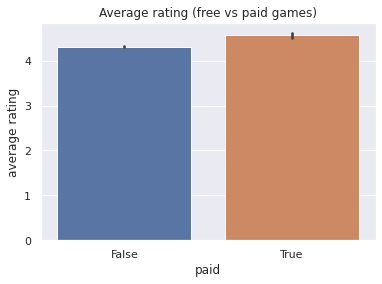

In [21]:
# Average of average rating by type of game(free vs paid)
sns.barplot(x = 'paid', y = 'average rating', estimator = np.mean, data = df)
plt.title("Average rating (free vs paid games)")

In [22]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
df.head(3)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500000000.0,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100000000.0,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100000000.0,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False


In [24]:
df_cluster = df[['category','installs','average rating']].groupby("category").agg(['mean','median'])

In [25]:
df_cluster


installs             average rating       
                           mean      median           mean median
category                                                         
GAME ACTION        6.650000e+07  50000000.0       4.246100  4.255
GAME ADVENTURE     1.888000e+07  10000000.0       4.264200  4.305
GAME ARCADE        6.931000e+07  50000000.0       4.294900  4.325
GAME BOARD         2.038000e+07  10000000.0       4.347100  4.360
GAME CARD          1.148361e+07   5000000.0       4.421066  4.475
GAME CASINO        7.885000e+06   5000000.0       4.437800  4.450
GAME CASUAL        6.712745e+07  50000000.0       4.335196  4.350
GAME EDUCATIONAL   1.595500e+07  10000000.0       4.253600  4.225
GAME MUSIC         1.285600e+07   5000000.0       4.180300  4.210
GAME PUZZLE        3.631000e+07  10000000.0       4.394200  4.410
GAME RACING        4.640000e+07  30000000.0       4.312000  4.310
GAME ROLE PLAYING  1.449000e+07  10000000.0       4.276000  4.260
GAME SIMULATION    2.871000e+07  10000000.0       4.318200  4.340
GAME SPORTS        3.491000e+07  10000000.0       4.261100  4.245
GAME STRATEGY      2.392000e+07  10000000.0       4.265000  4.300
GAME TRIVIA        7.041000e+06   5000000.0       4.245700  4.320
GAME WORD          1.306604e+07  10000000.0       4.443585  4.505

In [26]:
df_cluster = df_cluster.droplevel(1, axis = 1)


In [27]:
scaler = StandardScaler().fit(df_cluster)
df_cluster_std = scaler.transform(df_cluster)

In [28]:
error = []
for i in range(2,15): # we only have 17 categories, this is prabably too much.
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 101).fit(df_cluster_std)
    error.append(km.inertia_)

Text(0, 0.5, 'Error')

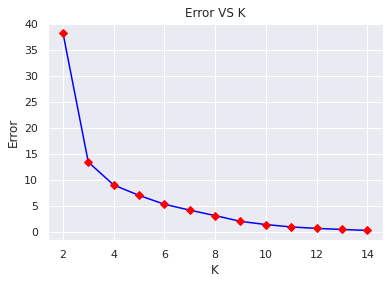

In [29]:
plt.plot(range(2,15), error, marker = 'D', markerfacecolor = 'red', color = 'blue', markeredgecolor = 'red')
plt.title("Error VS K")
plt.xlabel('K')
plt.ylabel('Error')